In [1]:
## Module import
import numpy as np
import pandas as pd

In [2]:
## Data import
data_loc = '../Data/'

sentiment_data = pd.read_csv(data_loc + 'BTC_final_score.csv')
price_data = pd.read_csv(data_loc + 'bitcoin_price_data.csv')

In [3]:
sentiment_data.head()

,final_score,tweet,time,date,1_min_window_score,1_hour_window_score
0,0.000000,Opinion: Does Bitcoin Magazine create valuable...,12:37:45,2022-01-23 12:37:45,0.000000,NaN
1,0.000000,@glyph @eevee @jlazaroff Also needs to learn B...,12:37:50,2022-01-23 12:37:50,0.000000,NaN
2,0.000000,@RaoulGMI Previous cycles at 800 days before t...,12:37:51,2022-01-23 12:37:51,0.000000,NaN
3,0.000475,Bitcoin 1-day social activity: Galaxy Score™ ...,12:37:52,2022-01-23 12:37:52,0.000475,NaN
4,0.000000,Is this me or Everyone who don’t have money to...,12:38:00,2022-01-23 12:38:00,0.000000,NaN


In [4]:
## Create an hour column
sentiment_data['hour'] = sentiment_data['time'].apply(lambda x: x.split(':')[0])
sentiment_data.head()

,final_score,tweet,time,date,1_min_window_score,1_hour_window_score,hour
0,0.000000,Opinion: Does Bitcoin Magazine create valuable...,12:37:45,2022-01-23 12:37:45,0.000000,NaN,12
1,0.000000,@glyph @eevee @jlazaroff Also needs to learn B...,12:37:50,2022-01-23 12:37:50,0.000000,NaN,12
2,0.000000,@RaoulGMI Previous cycles at 800 days before t...,12:37:51,2022-01-23 12:37:51,0.000000,NaN,12
3,0.000475,Bitcoin 1-day social activity: Galaxy Score™ ...,12:37:52,2022-01-23 12:37:52,0.000475,NaN,12
4,0.000000,Is this me or Everyone who don’t have money to...,12:38:00,2022-01-23 12:38:00,0.000000,NaN,12


<AxesSubplot:xlabel='time'>

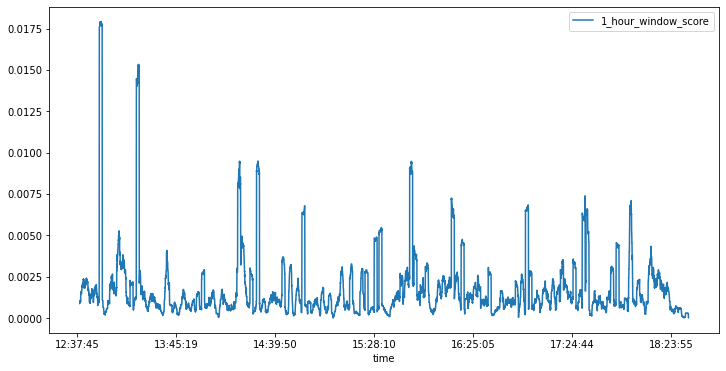

In [5]:
## Plot the sentiment score
sentiment_data.plot(x='time', y='1_hour_window_score', figsize=(12,6))

In [6]:
price_data.head()

,price,date,time
0,35180.435463,2022-01-23,00:02:46
1,35432.611344,2022-01-23,01:00:04
2,35448.608107,2022-01-23,02:02:42
3,35044.592629,2022-01-23,03:00:30
4,35176.657286,2022-01-23,04:01:48


In [7]:
price_data['hour'] = price_data['time'].apply(lambda x: x.split(':')[0])
price_data.head()

,price,date,time,hour
0,35180.435463,2022-01-23,00:02:46,00
1,35432.611344,2022-01-23,01:00:04,01
2,35448.608107,2022-01-23,02:02:42,02
3,35044.592629,2022-01-23,03:00:30,03
4,35176.657286,2022-01-23,04:01:48,04


In [8]:
## Convert hour column to int
price_data['hour'] = price_data['hour'].astype(int)
sentiment_data['hour'] = sentiment_data['hour'].astype(int)

<AxesSubplot:xlabel='time'>

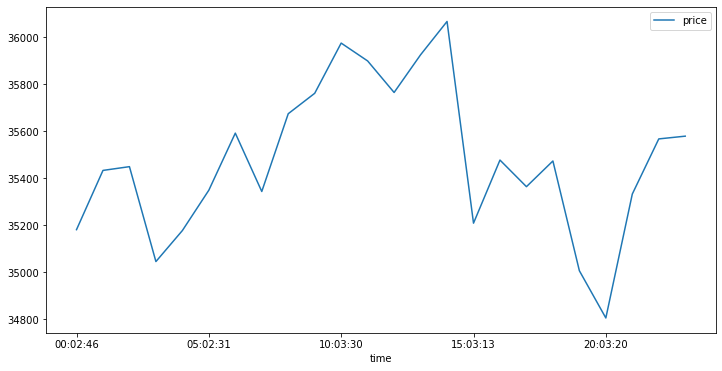

In [9]:
## Plot the price data
price_data.plot(x='time', y='price', figsize=(12,6))

In [10]:
## Create a new dataframe where the time of format H:M:S, where H changes every hour
sentiment_data['hour'] = sentiment_data['time'].apply(lambda x: x.split(':')[0])
sentiment_data['hour'] = sentiment_data['hour'].astype(int)
sentiment_data.head()

,final_score,tweet,time,date,1_min_window_score,1_hour_window_score,hour
0,0.000000,Opinion: Does Bitcoin Magazine create valuable...,12:37:45,2022-01-23 12:37:45,0.000000,NaN,12
1,0.000000,@glyph @eevee @jlazaroff Also needs to learn B...,12:37:50,2022-01-23 12:37:50,0.000000,NaN,12
2,0.000000,@RaoulGMI Previous cycles at 800 days before t...,12:37:51,2022-01-23 12:37:51,0.000000,NaN,12
3,0.000475,Bitcoin 1-day social activity: Galaxy Score™ ...,12:37:52,2022-01-23 12:37:52,0.000475,NaN,12
4,0.000000,Is this me or Everyone who don’t have money to...,12:38:00,2022-01-23 12:38:00,0.000000,NaN,12


In [11]:
## Create a dataframe from snetiment_data with rows where the hour value of next row is plus 1
sentiment_data_hourly = sentiment_data[sentiment_data['hour'] != sentiment_data['hour'].shift(-1)]
sentiment_data_hourly.head()

,final_score,tweet,time,date,1_min_window_score,1_hour_window_score,hour
567,0.000000,Bitcoin drops 50% from its peak value — RT Bus...,12:59:59,2022-01-23 12:59:59,0.000000,0.000260,12
2514,0.000000,Zoom out #bitcoin,13:59:57,2022-01-23 13:59:57,0.000000,0.000581,13
4772,0.003301,@mecee @TrammellVC @TuurDemeester and many...,14:59:59,2022-01-23 14:59:59,0.003301,0.000833,14
7251,0.000000,Bitcoin pumps again,15:59:57,2022-01-23 15:59:57,0.000000,0.001140,15
9254,0.000000,Fear and great index still super negative 😱!!!...,16:59:59,2022-01-23 16:59:59,0.000000,0.001094,16


In [12]:
sentiment_data_hourly.tail()

,final_score,tweet,time,date,1_min_window_score,1_hour_window_score,hour
4772,0.003301,@mecee @TrammellVC @TuurDemeester and many...,14:59:59,2022-01-23 14:59:59,0.003301,0.000833,14
7251,0.000000,Bitcoin pumps again,15:59:57,2022-01-23 15:59:57,0.000000,0.001140,15
9254,0.000000,Fear and great index still super negative 😱!!!...,16:59:59,2022-01-23 16:59:59,0.000000,0.001094,16
11192,0.002852,@beeple I ask you Which crypto community enjo...,17:59:57,2022-01-23 17:59:57,0.002852,0.006283,17
12344,0.000000,@NFDoges Thank you for the airdrop opportunity...,18:31:55,2022-01-23 18:31:55,0.000000,0.000011,18


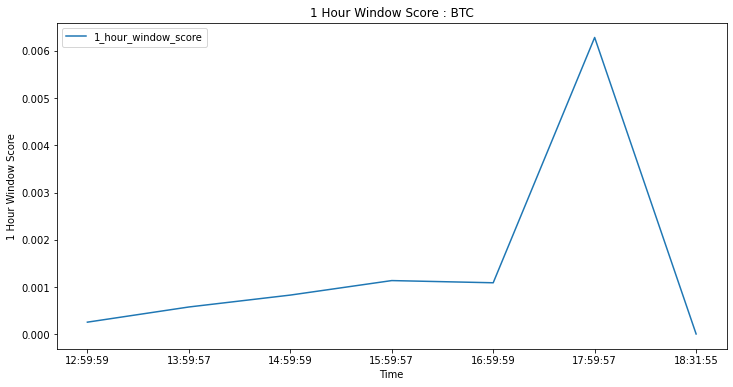

In [13]:
## Plot the sentiment score
plot = sentiment_data_hourly.plot(x='time', y='1_hour_window_score', figsize=(12,6))
plot.set_xlabel('Time')
plot.set_ylabel('1 Hour Window Score')
plot.set_title('1 Hour Window Score : BTC')
plot.legend(loc='upper left')

In [14]:
## Function to merge sentiment_data_hourly and price_data based on time
def merge_data(sentiment_data_hourly, price_data):
    data = sentiment_data_hourly.merge(price_data, on='hour')
    return data

data = merge_data(sentiment_data_hourly, price_data)
data.head()


,final_score,tweet,time_x,date_x,1_min_window_score,1_hour_window_score,hour,price,date_y,time_y
0,0.000000,Bitcoin drops 50% from its peak value — RT Bus...,12:59:59,2022-01-23 12:59:59,0.000000,0.000260,12,35764.305391,2022-01-23,12:03:02
1,0.000000,Zoom out #bitcoin,13:59:57,2022-01-23 13:59:57,0.000000,0.000581,13,35924.694758,2022-01-23,13:00:55
2,0.003301,@mecee @TrammellVC @TuurDemeester and many...,14:59:59,2022-01-23 14:59:59,0.003301,0.000833,14,36066.538675,2022-01-23,14:03:28
3,0.000000,Bitcoin pumps again,15:59:57,2022-01-23 15:59:57,0.000000,0.001140,15,35208.085093,2022-01-23,15:03:13
4,0.000000,Fear and great index still super negative 😱!!!...,16:59:59,2022-01-23 16:59:59,0.000000,0.001094,16,35476.641273,2022-01-23,16:12:06


In [15]:
data = data[['hour', '1_hour_window_score', 'price']]

In [16]:
len(data)

7

In [17]:
data[0:10]

,hour,1_hour_window_score,price
0,12,0.000260,35764.305391
1,13,0.000581,35924.694758
2,14,0.000833,36066.538675
3,15,0.001140,35208.085093
4,16,0.001094,35476.641273
5,17,0.006283,35363.396083
6,18,0.000011,35472.731436


In [18]:
## Function to normalize 1 hour window score to 0 to 1 and price to 0 to 1
def normalize_data(data):
    data['1_hour_window_score'] = (data['1_hour_window_score'] - data['1_hour_window_score'].min()) / (data['1_hour_window_score'].max() - data['1_hour_window_score'].min())
    #data['price_change_delta'] = (data['price'] - data['price'].shift(1)) / data['price'].shift(1)
    return data

data = normalize_data(data)
data.head()

,hour,1_hour_window_score,price
0,12,0.039832,35764.305391
1,13,0.091004,35924.694758
2,14,0.131161,36066.538675
3,15,0.180087,35208.085093
4,16,0.172682,35476.641273


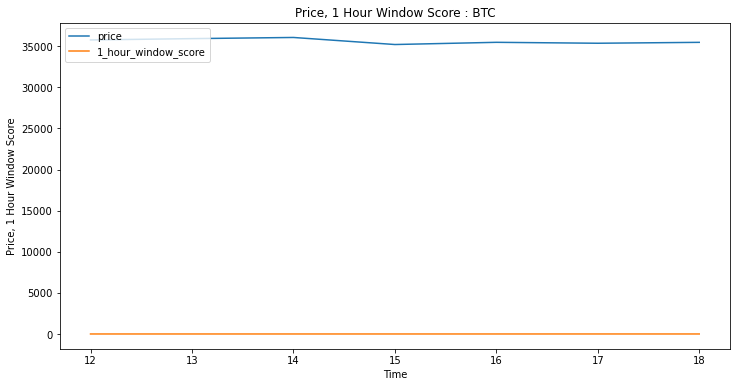

In [20]:
## Plot price, 1_hour_window_score with time
plot = data.plot(x='hour', y=['price','1_hour_window_score'], figsize=(12,6))
plot.set_xlabel('Time')
plot.set_ylabel('Price, 1 Hour Window Score')
plot.set_title('Price, 1 Hour Window Score : BTC')
plot.legend(loc='upper left')


In [26]:
## Normalise the price data
data['price_norm'] = (price_data['price'] - price_data['price'].min()) / (price_data['price'].max() - price_data['price'].min())
data.head()

,hour,1_hour_window_score,price,price_norm
0,12,0.039832,35764.305391,0.297846
1,13,0.091004,35924.694758,0.497672
2,14,0.131161,36066.538675,0.510348
3,15,0.180087,35208.085093,0.190203
4,16,0.172682,35476.641273,0.294852


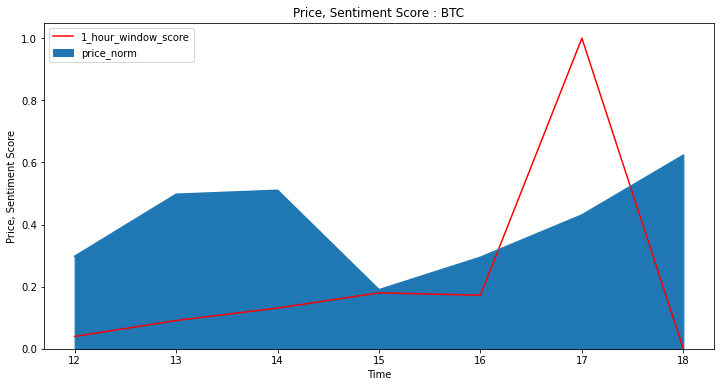

In [29]:
## Plot price, 1_hour_window_score with time where price is bar and 1_hour_window_score is line in the same plot
ax = data[['hour', '1_hour_window_score']].plot(x='hour',color='red', figsize=(12,6))
data[['hour', 'price_norm']].plot(x='hour', kind='area', figsize=(12,6), ax=ax)
ax.set_xlabel('Time')
ax.set_ylabel('Price, Sentiment Score')
ax.set_title('Price, Sentiment Score : BTC')
ax.legend(loc='upper left')
